## TASK 2 - Prediction using Unsupervised ML
### Problem Statement: From the given 'Iris' dataset, predict the optimal number of clusters and represent it visually.
### Author: Mohammed Misran

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

### Load the iris dataset

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print("Shape of iris df is", iris_df.shape)
print("The columns are:", iris_df.columns.values)

Shape of iris df is (150, 4)
The columns are: ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']


In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### What is clustering?
Clustering is an unsupervised machine learning technique. It is the process of division of the dataset into groups in which the members in the same group possess similarities in features.

The commonly used clustering algorithms are K-Means clustering, Hierarchical clustering, Density-based clustering, Model-based clustering, etc.

In this notebook, I am going to discuss K-Means clustering in detail.

### K-Means Clustering
1. Select the number of clusters *k* for the dataset
2. Select *k* number of centroids
3. By calculating the Euclidean distance or Manhattan distance assign the points to the nearest centroid, thus creating *k* groups
4. Now find the original centroid in each group
5. Again reassign the whole data point based on this new centroid, then repeat step 4 until the position of the centroid doesn’t change.

**Note**: Finding the optimal number of clusters is an important part of this algorithm. Two commonly used methods for finding the optimal *k* value are the **elbow method** and **average silhouette method**.

Before diving into the two methods described above, note that I will be running the algorithm on two sets of features:
* The 1st set of features will be *sepal length* and *sepal width*
* The 2nd set of features will be *petal length* and *petal width*

This grouping is just being done based on my intuition.

In [4]:
X1 = iris_df.iloc[:, 0:2].values # sepal length and sepal width
X2 = iris_df.iloc[:, 2:4].values # petal length and petal width
print("Shape of X1 is", X1.shape)
print("Shape of X2 is", X2.shape)

Shape of X1 is (150, 2)
Shape of X2 is (150, 2)


### Elbow Method
The Elbow method looks at the total within-cluster sum of square (WSS) as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

**Algorithm:**
1. Compute clustering algorithm (e.g., k-means clustering) for different values of *k*. For instance, by varying *k* from 1 to 10 clusters.
2. For each *k*, calculate the total within-cluster sum of square (WSS).
3. Plot the curve of WSS according to the number of clusters *k*.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [5]:
def elbow_method(X):
    wss = list()
    K = range(1, 11)
    for k in K:
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=k, init='k-means++', random_state=10)
        clusterer.fit(X)
        wss.append(clusterer.inertia_)
    
    # Plot elbow curve
    plt.plot(K, wss, 'bp-')
    plt.title('Elbow Method')
    plt.xlabel('Values of k')
    plt.ylabel('Inertia')

    # plot after visualizing
    k_at_elbow = 3
    plt.axvline(x=k_at_elbow, color="red", linestyle="--")
    
    plt.show()

#### Optimal number of clusters (using Elbow Method) for 1st set of features (i.e., sepal length and sepal width)

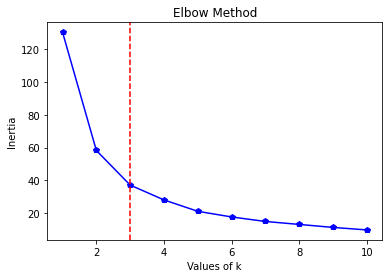

In [6]:
elbow_method(X1)

#### Optimal number of clusters (using Elbow Method) for 2nd set of features (i.e., petal length and petal width)

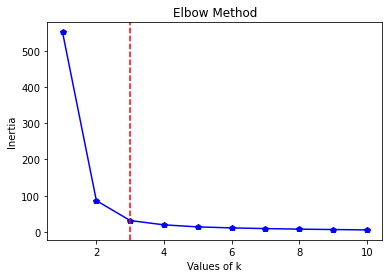

In [7]:
elbow_method(X2)

### Average Silhouette Method
Average silhouette method computes the average silhouette of observations for different values of *k*. The optimal number of clusters *k* is the one that maximize the average silhouette over a range of possible values for *k*.

**Algorithm:**
1. Compute clustering algorithm (e.g., k-means clustering) for different values of *k*. For instance, by varying *k* from 1 to 10 clusters.
2. For each *k*, calculate the average silhouette score of observations.
3. Plot the curve of average silhouette score according to the number of clusters *k*.
4. The location of the maximum is considered as the appropriate number of clusters.

In [8]:
def plot_silhouette_avg_curve(ax, range_n_clusters, avg_scores):
    ax.plot(range_n_clusters, avg_scores, 'bo-')
    ax.axvline(x= np.argmax(avg_scores) + 2, color="red", linestyle="--")
    ax.set_title('Curve of Silhouette Average Score')
    ax.set_xlabel('Values of k')
    ax.set_ylabel('Silhouette Avg Score')

def silhouette_average_method(X):
    range_n_clusters = [2, 3, 4] 
    fig2 = plt.figure(figsize=(25, 20))

    silhouette_avg_scores = list()

    for n_clusters in range_n_clusters:
        # Create subplot with 2 rows and 2 columns
        ax = plt.subplot(2, 2, n_clusters - 1)
        
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax.set_xlim([-0.1, 1])
        
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)
        
        # Compute the silhouette scores for each sample
        sample_silhouetee_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouetee_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
        
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
        
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.6
            )
            
            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10

        ax.set_title("Silhouette plot (n_clusters = %d)" % n_clusters)
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        
        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax.set_yticks([])
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    
    ax = plt.subplot(2, 2, 4)
    plot_silhouette_avg_curve(ax, range_n_clusters, silhouette_avg_scores)

    plt.show()

#### Optimal number of clusters (using Average Silhouette Method) for 1st set of features (i.e., sepal length and sepal width)

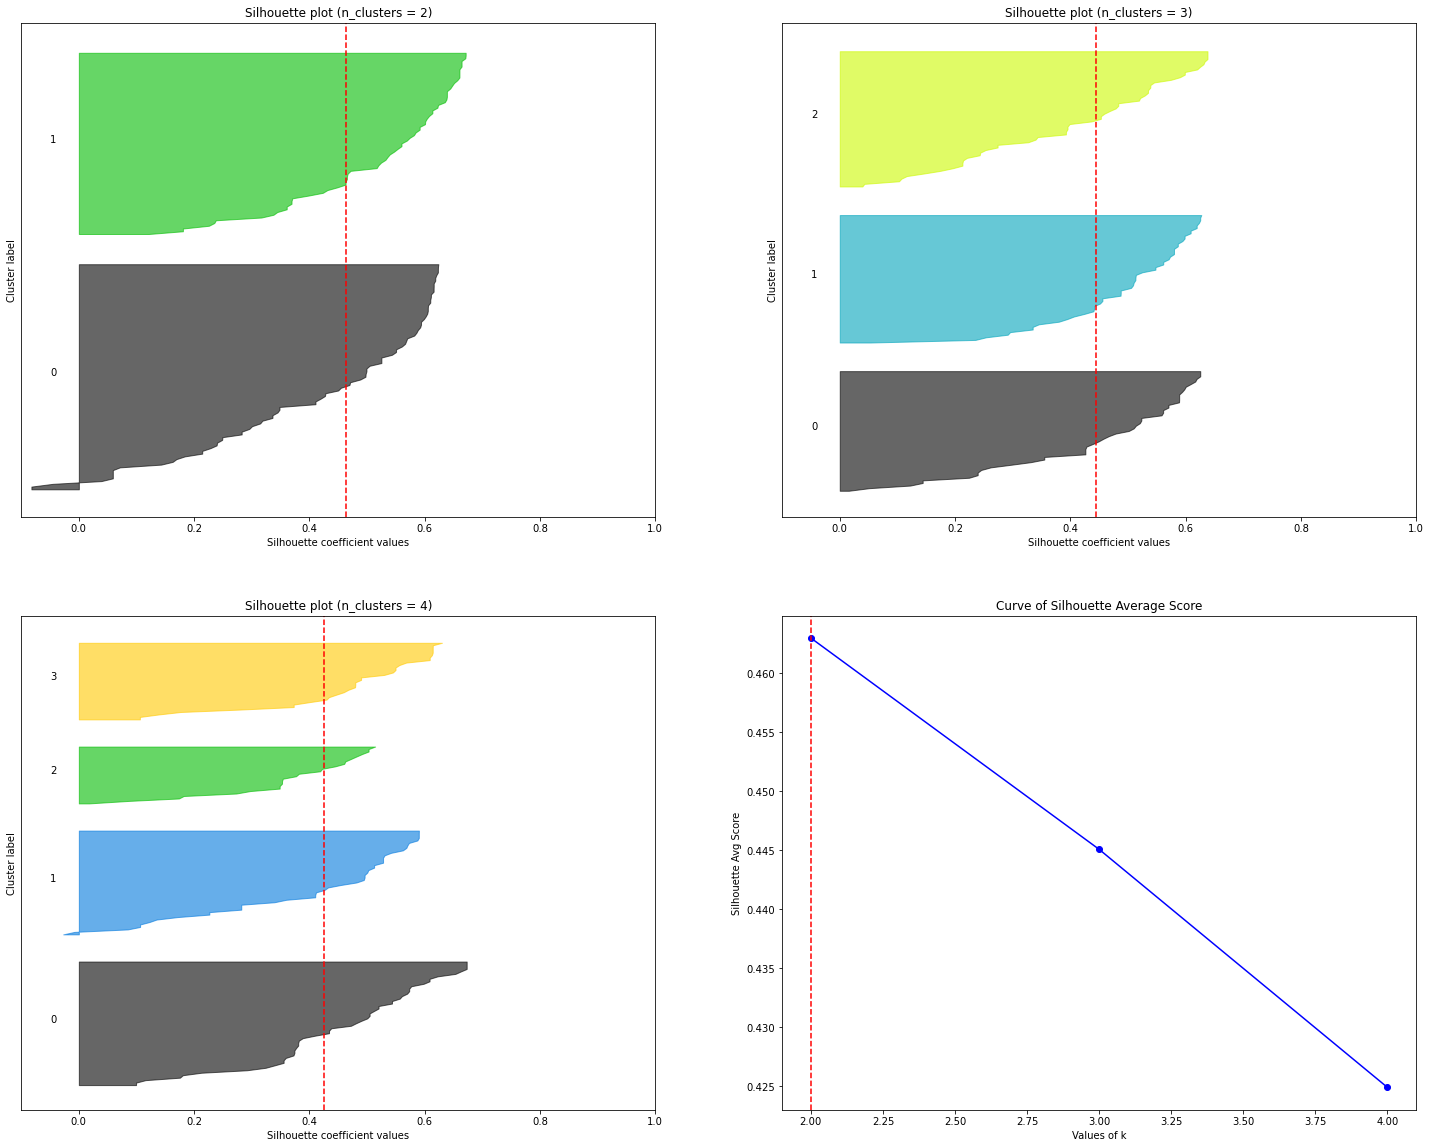

In [9]:
silhouette_average_method(X1)

#### Optimal number of clusters (using Average Silhouette Method) for 2nd set of features (i.e., petal length and petal width)

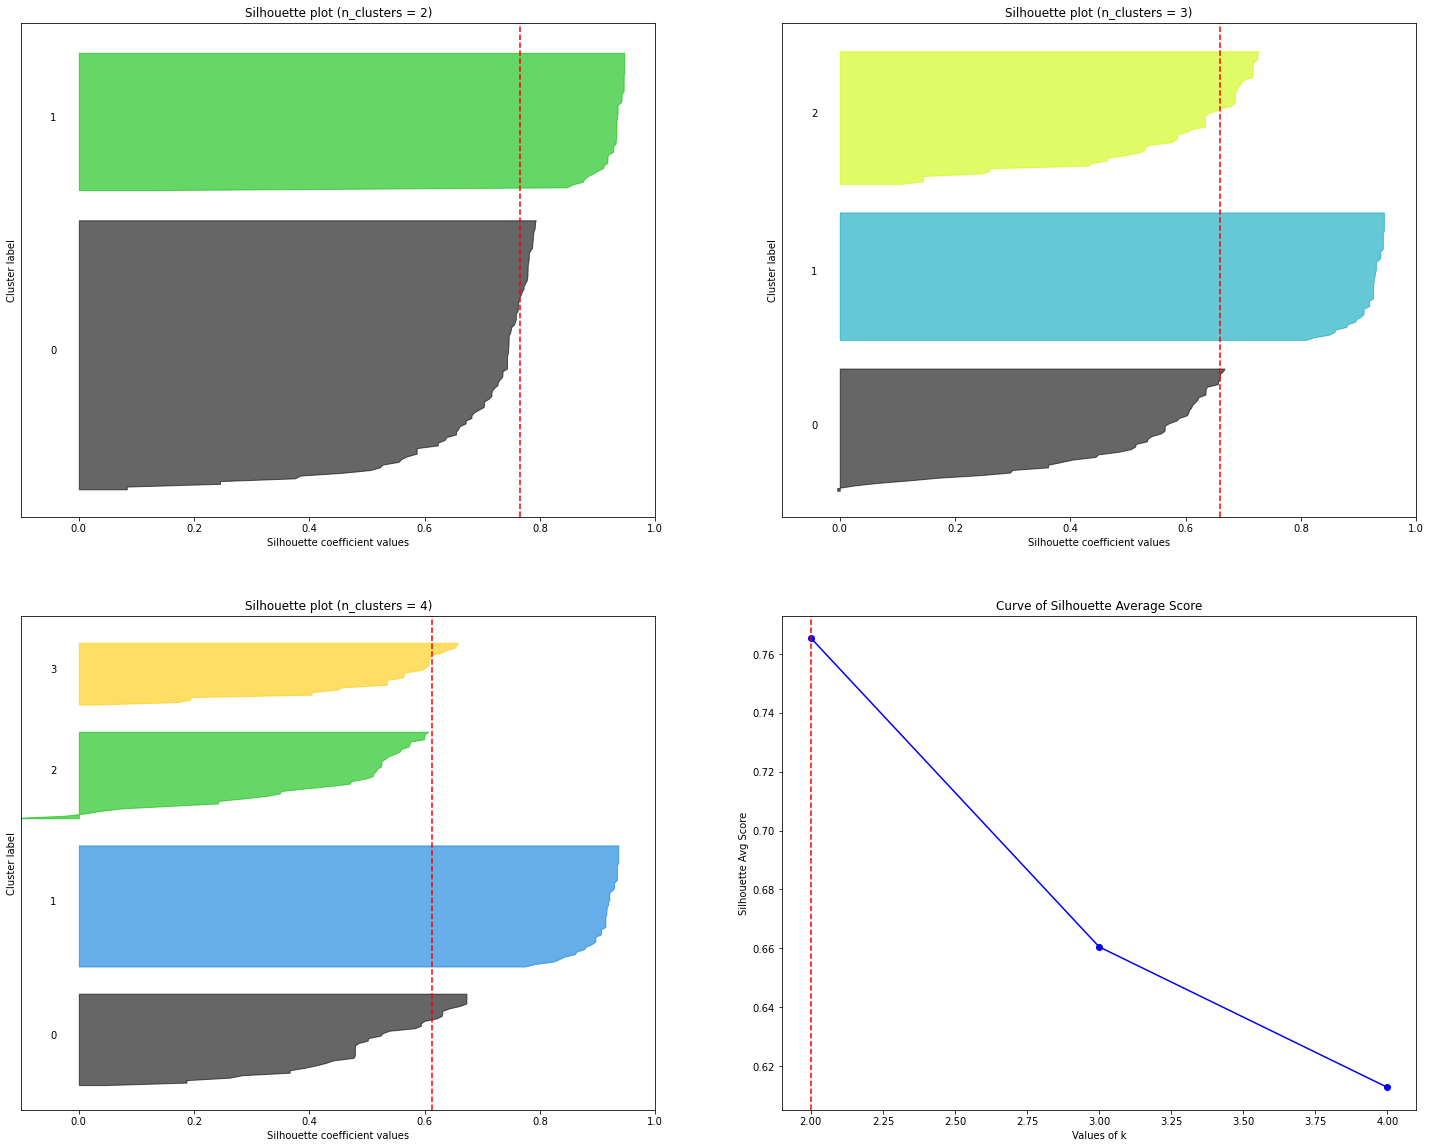

In [10]:
silhouette_average_method(X2)

In [11]:
# According to the above abservations, it's possible to define k = 3 as the optimal number of clusters in the data.
optimal_k = 3

### Visualize the clusters

In [12]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=50, linewidths=8, color='w', zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=70, linewidths=8, color='b', zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, labels, resolution=1000, show_centroids=True):
    # Find min and max boundaries
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    # Create 2D grids
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    
    # flatten 2D array and predict cluster
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()]) # flatten 2D array and predict cluster
    Z = Z.reshape(xx.shape)
    
    fig = plt.figure(figsize=(10, 5))
    
    # Plot filled contour
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2', alpha=0.5)
    # Draw contour lines to show boundaries
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    # Plot data on cluster
    plot_data(X)
    
    # Plot centroids
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    plt.title("K-Means Clusters")
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()

#### Clusters for 1st set of features (i.e., sepal length and sepal width)

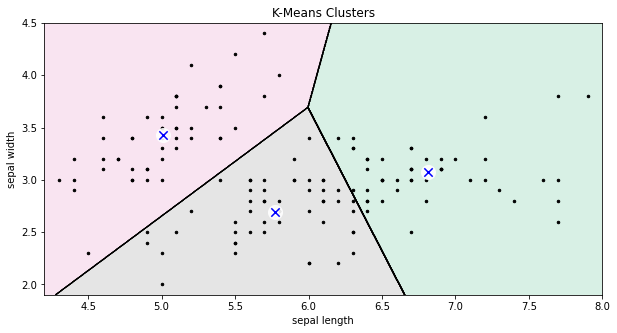

In [13]:
clusterer = KMeans(n_clusters=optimal_k, init='k-means++', random_state=10)
clusterer.fit(X1)
plot_decision_boundaries(clusterer, X1, ["sepal length", "sepal width"])

#### Clusters for 2nd set of features (i.e., petal length and petal width)

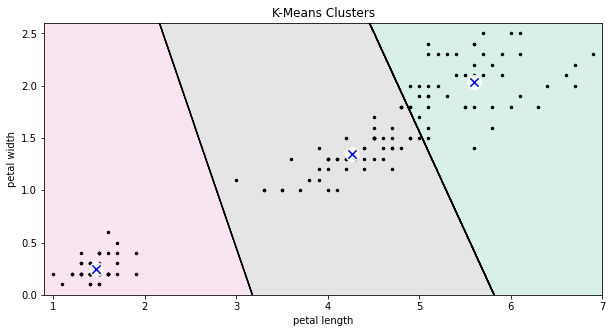

In [14]:
clusterer = KMeans(n_clusters=optimal_k, init='k-means++', random_state=10)
clusterer.fit(X2)
plot_decision_boundaries(clusterer, X2, ["petal length", "petal width"])